In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn 패키지 제공 데이터
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

# 과제(단톡방)
- 아이리스 데이터를 활용하여 군집화하기

In [3]:
# 데이터 불러오기
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# y변수 생략하기
df2 = df.drop(['species'], axis=1)
df2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# 스케일링
from sklearn.preprocessing import StandardScaler

df2_scaled = StandardScaler().fit_transform(df2)
df2_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

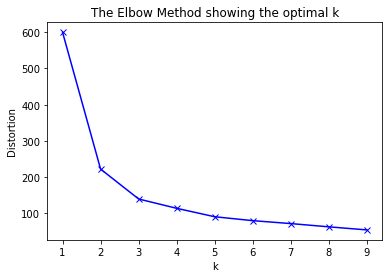

In [6]:
# 최적 클러스터 개수 찾기 (Elbow point 찾기)
X = df2_scaled

inertia_arr = [] # SSE 값을 저장하기 위한 list
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters = k, random_state=0).fit(X) # 모델 적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)

# Plot the elbow
plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
# 최적 군집 개수 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
# 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #차원 개수 설정
pca.fit(df2_scaled)

df2_pca = pca.transform(df2_scaled)

print("축소전:", df2_scaled.shape)
print("축소후:", df2_pca.shape)

축소전: (150, 4)
축소후: (150, 2)


In [10]:
# 바뀐 값 확인
df2_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [11]:
clos = ['pc1', 'pc2']
df2_pca = pd.DataFrame(data=df2_pca, columns=clos)
df2_pca

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [12]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
# 품종 칼럼과 클러스터 번호 칼럼 추가
df2_pca['species'] = df.species
df2_pca['target'] = kmeans.labels_
df2_pca

,pc1,pc2,species,target
0,-2.264703,0.480027,setosa,1
1,-2.080961,-0.674134,setosa,1
2,-2.364229,-0.341908,setosa,1
3,-2.299384,-0.597395,setosa,1
4,-2.389842,0.646835,setosa,1
...,...,...,...,...
145,1.870503,0.386966,virginica,2
146,1.564580,-0.896687,virginica,0
147,1.521170,0.269069,virginica,2
148,1.372788,1.011254,virginica,2


Text(0, 0.5, 'pc2')

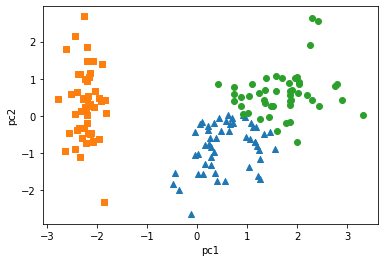

In [14]:
# 차원축소를 통한 클러스터링 결과
# 세 가지 종류의 marker로 그래프 상에 좌표 표시
markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
    x_val = df2_pca[df2_pca['target']==i]['pc1']
    y_val = df2_pca[df2_pca['target']==i]['pc2']
    plt.scatter(x_val, y_val, marker=marker)


plt.xlabel('pc1')
plt.ylabel('pc2')

In [15]:
# 'setosa' =0 , 'versicolor' = 2, 'virginica' = 1
df2_pca

,pc1,pc2,species,target
0,-2.264703,0.480027,setosa,1
1,-2.080961,-0.674134,setosa,1
2,-2.364229,-0.341908,setosa,1
3,-2.299384,-0.597395,setosa,1
4,-2.389842,0.646835,setosa,1
...,...,...,...,...
145,1.870503,0.386966,virginica,2
146,1.564580,-0.896687,virginica,0
147,1.521170,0.269069,virginica,2
148,1.372788,1.011254,virginica,2


In [31]:
# 본래의 값에 해당하는 컬럼 추가 ('setosa' =0 , 'versicolor' = 2, 'virginica' = 1)
df2_pca.loc[df2_pca.species=="setosa", 'species_1'] = 1
df2_pca.loc[df2_pca.species=="versicolor", 'species_1'] = 0
df2_pca.loc[df2_pca.species=="virginica", 'species_1'] = 2

# 자료형 변환
df2_pca = df2_pca.astype({'species_1':'int'})
df2_pca

,pc1,pc2,species,target,species_1,tf
0,-2.264703,0.480027,setosa,1,1,True
1,-2.080961,-0.674134,setosa,1,1,True
2,-2.364229,-0.341908,setosa,1,1,True
3,-2.299384,-0.597395,setosa,1,1,True
4,-2.389842,0.646835,setosa,1,1,True
5,-2.075631,1.489178,setosa,1,1,True
6,-2.444029,0.047644,setosa,1,1,True
7,-2.232847,0.223148,setosa,1,1,True
8,-2.334640,-1.115328,setosa,1,1,True
9,-2.184328,-0.469014,setosa,1,1,True


In [32]:
df2_pca['tf'] = df2_pca['target'] == df2_pca['species_1']
df2_pca

,pc1,pc2,species,target,species_1,tf
0,-2.264703,0.480027,setosa,1,1,True
1,-2.080961,-0.674134,setosa,1,1,True
2,-2.364229,-0.341908,setosa,1,1,True
3,-2.299384,-0.597395,setosa,1,1,True
4,-2.389842,0.646835,setosa,1,1,True
5,-2.075631,1.489178,setosa,1,1,True
6,-2.444029,0.047644,setosa,1,1,True
7,-2.232847,0.223148,setosa,1,1,True
8,-2.334640,-1.115328,setosa,1,1,True
9,-2.184328,-0.469014,setosa,1,1,True


In [33]:
# 고유값 개수 확인하기
df2_pca['tf'].value_counts()

True     124
False     26
Name: tf, dtype: int64

In [30]:
정확도 = 124/150
정확도

0.8266666666666667

In [21]:
pd.set_option('display.max_row', 150)
df2_pca

,pc1,pc2,species,target,species_1,tf
0,-2.264703,0.480027,setosa,1,0,False
1,-2.080961,-0.674134,setosa,1,0,False
2,-2.364229,-0.341908,setosa,1,0,False
3,-2.299384,-0.597395,setosa,1,0,False
4,-2.389842,0.646835,setosa,1,0,False
5,-2.075631,1.489178,setosa,1,0,False
6,-2.444029,0.047644,setosa,1,0,False
7,-2.232847,0.223148,setosa,1,0,False
8,-2.334640,-1.115328,setosa,1,0,False
9,-2.184328,-0.469014,setosa,1,0,False
